# Titanic Data Analysis - Ada Zamora

I will use a dataset containing information of 891 of the 2224 passengers on the Titanic. This data includes passengers' age, ticket class, sex, name, among other variables.

## Questions I want to answer with this data:

1. How are passengers distributed by age?
2. What is the percentage of passengers by age, gender, ticket class and departure port?
3. What is the percentage of passengers who died?  
4. What is the amount of passengers who died and survived per class, gender and age?
5. What are the survival rates when pairs of variables are combined?
6. What is the approximate ticket fare by ticket class and departure port?


In [1]:
%matplotlib inline

# Uploading the data:

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab, mlab, pyplot
plt = pyplot


filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

#Verifying if the file was uploaded correctly
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


First of all, I want to use the function describe() to know a little about the data and have some insights of it

In [2]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above I can see several things about the data, like the mean age of passengers (29 years old) and that we only have age data of 714 of the 891 passenger's in the data set. 

I also see that the average ticket fare is around 32 (the currency of this price is not described in the data set, nor in the kaggle description of the data set).

The survived column is filled with zeros and ones, meaning 1 that the passenger survived 0 otherwise. This column's mean is 0.38, which gives an insight that almost 60% of the titanic passengers died. We'll go in more depth about this when answering the defined questions.

### Data Wrangling 

Now I want to check if there are some missing values in the data, when I used the describe() function I spotted missing values in the Age column, but as the describe function only takes into consideration the numerical columns, I'll check for missing values in all columns of the data frame.

In [3]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Using the isnull() function I confirmed that there are 177 missing values in the Age column and I found missing values in the Cabin and Embarked column.

My plan to handle the missing values per column is the following:
- For the Age column, I'll delete the missing values. As the amount of missing values in this column is significant, I'll create a new data frame that excludes the missing values and I'll use that data frame any time I want to use the Age variable. Otherwise, I'll use the entire data set.
- The Cabin variable has 687 missing values of the 891 of the data frame, that represents a 77% of missing values, which is a very high number. As I'm not planning to use the Cabin variable for my data analysis, I will delete the entire column from the data frame.
- The Embarked column has only 2 missing values, so I'll use the column as it is, with the missing values.


In [4]:
# Deleting the Cabin column

titanic_df.drop(['Cabin'], axis=1, inplace=True)

# Verifying if the column was deleted correctly

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
# Creating a new data frame that excludes the missing age values 

titanic_valid_ages = titanic_df.dropna(subset=["Age"]).copy()

### 1. How are passengers distributed by age?

To answer this question, I'll create an histogram to visualize the age of all passengers:

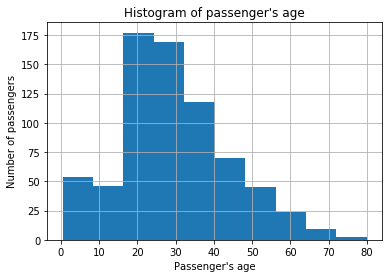

In [6]:
plt.figure()
titanic_valid_ages.hist('Age', bins = 10)
plt.xlabel("Passenger's age")
plt.ylabel('Number of passengers')
plt.title("Histogram of passenger's age")
plt.show()

With these results I see that most of the passengers are between 18 and 40 years old, so decide to segregate the passengers by age group, defining the groups ages as follow:
<br/>
Group A: from 0 to 17 years old <br/>
Group B: from 18 to 40 years old <br/>
Group C: from 41 to 80 years old <br/> <br/>
Now, I'll calculate the age group for each passenger whose age we know and add it to the data frame. 

In [7]:
#Creating a new column in the data frame called 'Age Group'

titanic_valid_ages['Age group'] = 0
titanic_valid_ages

# Now I want to change the order of the columns in the data frame, to have the Age group column next to the age column
cols = list(titanic_valid_ages.columns.values)
titanic_valid_ages = titanic_valid_ages.loc[:,('PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Age group', 'SibSp', 
                                         'Parch','Ticket', 'Fare', 'Embarked')]

In [8]:
# I'll create a function to apply to the dataset to add an age group to every passengger's age

def set_age_group(age):
    """Outputs an age group given a valid age."""
    if 0 <= age <= 17:
        return 1
    elif 17 < age <= 40:
        return 2
    elif age > 40:
        return 3
    
# Applying the function to the data frame
titanic_valid_ages['Age group'] = titanic_valid_ages['Age'].map(set_age_group)

# Now I want to verify if the function was applied correctly
titanic_valid_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age group,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,2,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,2,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,2,0,0,373450,8.0500,S


## 2. What is the percentage of passengers by age, gender, ticket class and departure port?

To answer this question, I'll create a function where I can input the column I want to study and then I can get some statistics about it and a pie plot of the corresponding percentages.

In [9]:
def group_data_by_column(column_to_group):
    """ Groups data by a given column and returns the grouped data. If the column is 'Age' or 'Age group', it uses the data 
    frame with the ages, (titanic_valid_ages), otherwise, it uses the entire dataset
    
    column_to_group: a string containing the name of the column to group
    """
    if column_to_group in ('Age', 'Age group'):
        df = titanic_valid_ages
    else:
        df = titanic_df    
    return df.groupby(column_to_group, as_index = False).size() 


def create_pie_plot(column_to_plot, labels_for_plot, plot_title):
    """ Plots a pie plot given a column and prints the absolute values used to calculate the percentages for the plot. 
    The input column is grouped before making the plot using the group_data_by_column function.
    
    column_to_plot: a string containing the name of the column to plot
    labels_for_plot: list of strings, containing the labels for the groups
    plot_title: sting containing the title of the plot
    """
    grouped_data = group_data_by_column(column_to_plot)
    plt.figure(figsize=[5,5])
    plt.pie(grouped_data, labels=labels_for_plot, autopct='%.2f%%') 
    plt.title(plot_title)
    plt.show()
    print grouped_data

Now I'll use the above function to create several pie charts to describe the data. All data in pie charts is presented in percentages, and below each chart, there's a table with the relative values used to obtain the percentages.

### Percentage of passengers aboard the Titanic by age group


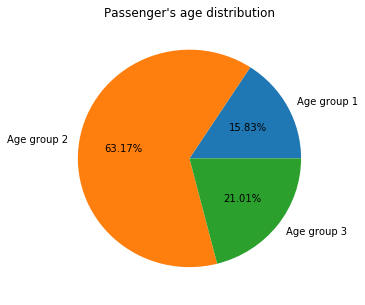

Age group
1    113
2    451
3    150
dtype: int64


In [10]:
create_pie_plot('Age group', ['Age group 1', 'Age group 2', 'Age group 3'], "Passenger's age distribution")

In this plot we can see that 15.8% of the passenger's are between 0 and 17 years old, 63.2% between 18 and 40 years old and 21% older than 41 years. When I used the describe function to the whole data set above, the maximum age of passengers was 80 years old, so I can say that this 21% of passengers is between 41 and 80 years old.

### Percentage of passengers aboard the Titanic by gender


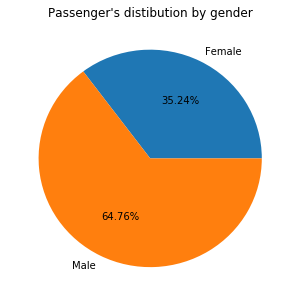

Sex
female    314
male      577
dtype: int64


In [11]:
create_pie_plot('Sex', ['Female', 'Male'], "Passenger's distibution by gender")

### Percentage of passengers aboard the Titanic by ticket fare class


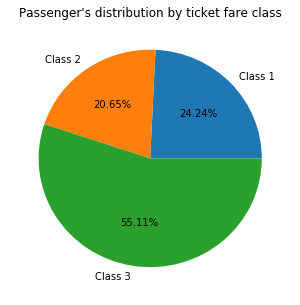

Pclass
1    216
2    184
3    491
dtype: int64


In [12]:
create_pie_plot('Pclass', ['Class 1', 'Class 2', 'Class 3'], "Passenger's distribution by ticket fare class")

### Percentage of passengers who boarded the Titanic in each port

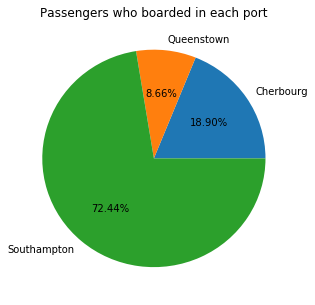

Embarked
C    168
Q     77
S    644
dtype: int64


In [13]:
create_pie_plot('Embarked', ['Cherbourg', 'Queenstown', 'Southampton'], "Passengers who boarded in each port" )

## 3. What is the percentage of passengers who died?  

To answer this question, I'll use the functions I developed for question 2.

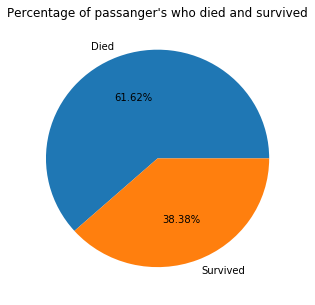

Survived
0    549
1    342
dtype: int64


In [14]:
create_pie_plot('Survived', ['Died', 'Survived'], "Percentage of passanger's who died and survived")

Here we can see that only 38.4% of passenger's survived the Titanic disaster, while 61.6% died, which represents 342 and 549 passengers, respectively. This verifies the statistics seen when the describe function was applied to the entire data set and the mean of the survived column was 0.3838

## 4. What is the amount of passengers who died and survived per class, gender and age?

To answer this, I'll create two functions. One, to segregate the passengers who died and survived by the desired variable and another one to plot the results in a combined bar chart.

In [15]:
def group_survivors_by(column_to_group):
    """Returns the number of passengers who died and survived per variable."""
    if column_to_group in ('Age', 'Age group'):
        df = titanic_valid_ages
    else:
        df = titanic_df
    survivors = df.groupby(['Survived', column_to_group], as_index = False).size()
    passangers_died = survivors.iloc[survivors.index.get_level_values('Survived') == 0]
    passangers_survived = survivors.iloc[survivors.index.get_level_values('Survived') == 1]
    return passangers_died, passangers_survived

In [16]:
def generate_combined_bar_chart(data_list, x_label, y_label, chart_title, index_array): 
    """Creates a combined bar plot.
    
    data_list: list of dictionaries of type {'label': 'label of the bar', 'value': values to plot}
    x_label, y_label and chart_title should be strings. 
    index_array: list of strings containing the titles for each set of bars in the chart. 
    """
    fig, ax = plt.subplots()
    index = np.arange(len(index_array))
    n_bars = len(data_list)
    colors_list = ['C0', 'C1', 'C2', 'C3', 'C4']
    bar_width = 0.7/n_bars
    plt.xticks(index + (bar_width * n_bars / 2) - 0.5 * bar_width, index_array)
    
    for i, data_value in enumerate(data_list):
        color = colors_list[i % len(colors_list)]
        label = data_value['label']
        plt.bar(index + i*bar_width, data_value['value'], width = bar_width, color=color, label=label)
    
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.legend(bbox_to_anchor=(1.35, 0.7), loc='center right', ncol=1)
    plt.tight_layout()
    return plt.show()

### Amount of passengers who died and survived by ticket fare class

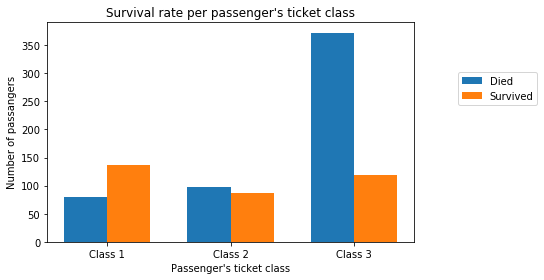

In [17]:
died_by_class, surv_by_class = group_survivors_by('Pclass')

generate_combined_bar_chart([{'label': 'Died', 'value': died_by_class}, {'label': 'Survived', 'value': surv_by_class}], 
                    "Passenger's ticket class", 'Number of passangers', "Survival rate per passenger's ticket class", 
                   ('Class 1', 'Class 2', 'Class 3'))

This chart illustrates that most of the deaths were passengers with third class tickets. Of the 491 passengers with third class tickets, 372 died and only 119 survived, this means that only 30% of the third class passengers survived the Titanic.

Passengers with second class tickets had better survival rates, being this rate about 50%. Of the 184 passengers, 97 of them died and 87 survived.

For the first class passengers, the survival rate is notoriously higher than for any other passengers by ticket class, being about 60%. Of the 216 passengers with first class tickets, 136 of them survived and 80 died.

### Amount of passengers who died and survived by age group

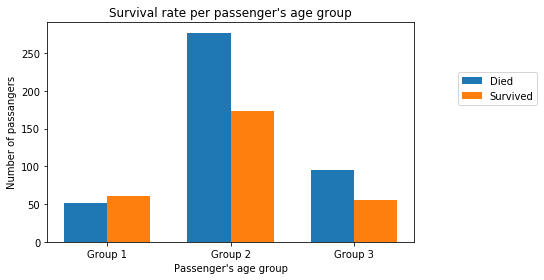

In [18]:
died_by_age_group, surv_by_age_group = group_survivors_by('Age group')

generate_combined_bar_chart([{'label': 'Died', 'value': died_by_age_group}, {'label': 'Survived', 'value': surv_by_age_group}], 
                    "Passenger's age group", 'Number of passangers', "Survival rate per passenger's age group", 
                   ('Group 1', 'Group 2', 'Group 3'))

In this plot we can see that passengers of age group 1 (from 0 to 17 years old) had the better survival rates, around 53% of them survived (61 passengers of 114).

For age group 2 (passengers from 18 to 40 years), the survival rates are the lowest of all three age groups, being 38%. Of the 451 passengers in age group 2, only 174 of them survived.

Age group 3 passengers (from 41 to 80 years old) had a survival rate of 36% (that is, 55 of 150 passengers).

### Amount of passengers who died and survived by gender

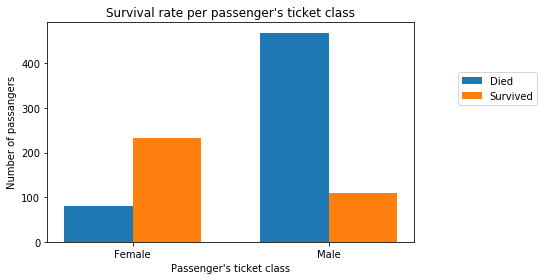

In [19]:
died_by_gender, surv_by_gender = group_survivors_by('Sex')

generate_combined_bar_chart([{'label': 'Died', 'value': died_by_gender}, {'label': 'Survived', 'value': surv_by_gender}], 
                    "Passenger's ticket class", 'Number of passangers', "Survival rate per passenger's ticket class", 
                   ('Female', 'Male'))

Here we can see that of the 314 females in our data set, 233 of them survived and 81 on them died, representing a survival rate of about 75%.

Males on Titanic had a survival rate of 18%. Only 109 male passengers survived of the 577 males in the data set.

## 5. What are the survival rates when pairs of variables are combined?

The answer this question I'll create a function to group the data set by two given variables and print the results

In [20]:
def calculate_survival_rates_two_variables(var1, var2, n_output):
    """Calculates the survival rates given two variables.
    
    var1 and var2: strings, corresponding to names of columns of the data set
    n_output: an integer (2 or 3) that refers to the number of groups that will be returned, depending on the variables.
    """
    if var1 in ('Age', 'Age group') or var2 in ('Age', 'Age group'):
        df = titanic_valid_ages
    else:
        df = titanic_df
    count_var1_var2 = df.groupby([var1, var2], as_index = False).size().reset_index(name='count')
    
    var1_var2 = df.groupby(['Survived', var1, var2], as_index = False).size().reset_index(name='count')

    surv_var1_var2 = var1_var2.iloc[((-3)*n_output):].copy()
    surv_var1_var2.index = range(3*n_output)
    surv_var1_var2['N pass'] = count_var1_var2['count']
    surv_var1_var2['Surv rate'] = (surv_var1_var2['count'] * 100)/surv_var1_var2['N pass']
    
    if n_output == 2:
        output1 = surv_var1_var2.iloc[:3]
        output2 = surv_var1_var2.iloc[-3:]
        output2.index = range(3)
        print output1, '\n', output2
        return output1, output2
    elif n_output == 3:
        output1 = surv_var1_var2.iloc[:3]
        output2 = surv_var1_var2.iloc[3:6]
        output2.index = range(3)
        output3 = surv_var1_var2.iloc[-3:]
        output3.index = range(3)
        print output1, '\n', output2, '\n', output3
        return output1, output2, output3

### Survival rate combining gender and ticket class

In [21]:
female_class, male_class = calculate_survival_rates_two_variables('Sex', 'Pclass', 2)

   Survived     Sex  Pclass  count  N pass  Surv rate
0         1  female       1     91      94  96.808511
1         1  female       2     70      76  92.105263
2         1  female       3     72     144  50.000000 
   Survived   Sex  Pclass  count  N pass  Surv rate
0         1  male       1     45     122  36.885246
1         1  male       2     17     108  15.740741
2         1  male       3     47     347  13.544669


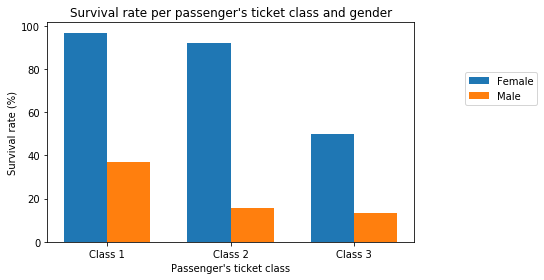

In [22]:
generate_combined_bar_chart([{'label': 'Female', 'value': female_class['Surv rate']}, 
                             {'label': 'Male', 'value': male_class['Surv rate']}], 
                            "Passenger's ticket class", 'Survival rate (%)', 
                            "Survival rate per passenger's ticket class and gender", ('Class 1', 'Class 2', 'Class 3'))

In the printed data sets and the bar chart that represents them, it can be seen that women had way higher survival rates than men. Women with first and second class tickets had a survival rate higher than 90%, while women with third class tickets had a 50% survival rate.

Men with first class tickets had only a 36% survival rate, while men with second and third class tickets had a 15 and 13 percent survival rate respectively. 

### Survival rate combining gender and age group

In [23]:
female_age, male_age = calculate_survival_rates_two_variables('Sex', 'Age group', 2)

   Survived     Sex  Age group  count  N pass  Surv rate
0         1  female          1     38      55  69.090909
1         1  female          2    122     158  77.215190
2         1  female          3     37      48  77.083333 
   Survived   Sex  Age group  count  N pass  Surv rate
0         1  male          1     23      58  39.655172
1         1  male          2     52     293  17.747440
2         1  male          3     18     102  17.647059


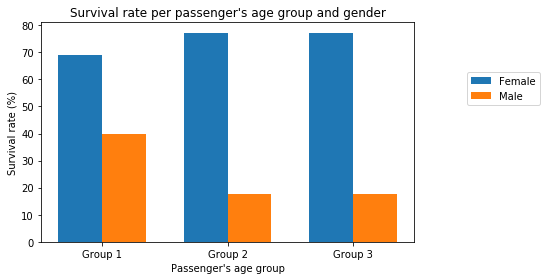

In [24]:
generate_combined_bar_chart([{'label': 'Female', 'value': female_age['Surv rate']}, 
                             {'label': 'Male', 'value': male_age['Surv rate']}], 
                            "Passenger's age group", 'Survival rate (%)', 
                            "Survival rate per passenger's age group and gender", ('Group 1', 'Group 2', 'Group 3'))

In this chart we can see that again, women had the best survival rates than men, being 69% for age group one, and 77% for age groups 2 a 3.

Group one males (from 0 to 17 years old) had a survival rate way higher than men of other age groups, being a little more than the double. Group one males survival rate was 39%, while for group two and three the survival rate was 17%.

It is interesting to note that although Group one males had a better survival rate than any other males by age group, group one women had the lowest survival rate compared with women in other age groups.

### Survival rate combining ticket class and age group

In [25]:
age_group1_class, age_group2_class, age_group3_class = calculate_survival_rates_two_variables('Age group', 'Pclass', 3)

   Survived  Age group  Pclass  count  N pass  Surv rate
0         1          1       1     11      12  91.666667
1         1          1       2     21      23  91.304348
2         1          1       3     29      78  37.179487 
   Survived  Age group  Pclass  count  N pass  Surv rate
0         1          2       1     72      98  73.469388
1         1          2       2     49     116  42.241379
2         1          2       3     53     237  22.362869 
   Survived  Age group  Pclass  count  N pass  Surv rate
0         1          3       1     39      76  51.315789
1         1          3       2     13      34  38.235294
2         1          3       3      3      40   7.500000


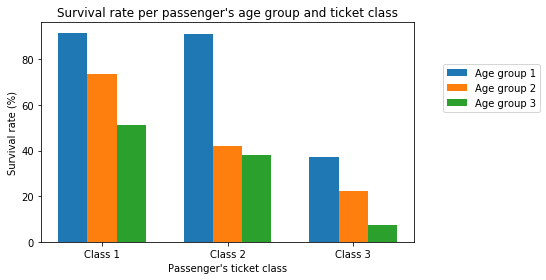

In [26]:
generate_combined_bar_chart([{'label': 'Age group 1', 'value': age_group1_class['Surv rate']}, 
                             {'label': 'Age group 2', 'value': age_group2_class['Surv rate']},
                             {'label': 'Age group 3', 'value': age_group3_class['Surv rate']}],
                            "Passenger's ticket class", 'Survival rate (%)', 
                            "Survival rate per passenger's age group and ticket class", ('Class 1', 'Class 2', 'Class 3'))

Here we can see that passengers from age group one and class one and two tickets had more than 90% probabilities to survive the Titanic. 

We can also see that only 7% of passengers from age group 3 (from 40 to 80 years old) and ticket's class three survived the Titanic.

## 6. What is the approximate ticket fare by ticket class and departure port?

To see how the tickets fares are distributed, I'm going to plot the tickets prices per passenger ticket class

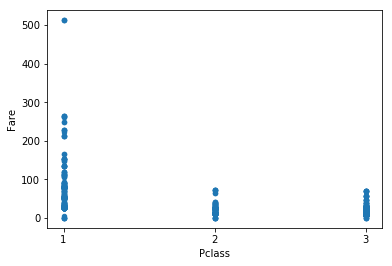

In [27]:
titanic_df.plot(kind='scatter', x='Pclass', y='Fare', xticks =[1,2,3])

There seems to be outliers in some of the first class ticket values, as the maximum value for first class ticket is about 280 and there are some of price 512. Checking the data frame, those three values correspond to first class passengers but they did not have any siblings or spouses registered in the data set.

Also, there are some tickets whose price is zero, those can be crew members or people who traveled for free (someone else payed for their ticket). As I'm interested in knowing the ticket fare per class, I will not take into account these outliers.

To dismiss the outliers in the approximate ticket fare calculations, I decided to use the median.

In [28]:
# Analizing the ticket's fare per ticket class and port

titanic_df.groupby(['Pclass', 'Embarked']).median()

PassengerId  Survived   Age  SibSp  Parch     Fare
Pclass Embarked                                                    
1      C               453.0       1.0  36.5    0.0    0.0  78.2667
       Q               329.5       0.5  38.5    1.5    0.0  90.0000
       S               493.0       1.0  37.0    0.0    0.0  52.0000
2      C               390.0       1.0  25.0    1.0    0.0  24.0000
       Q               323.0       1.0  43.5    0.0    0.0  12.3500
       S               439.0       0.0  30.0    0.0    0.0  13.5000
3      C               483.0       0.0  20.0    0.0    0.0   7.8958
       Q               400.5       0.0  21.5    0.0    0.0   7.7500
       S               432.0       0.0  25.0    0.0    0.0   8.0500

Here can be seen the median price for ticket class and port. Now I'll represent these results in a plot. To do that, I'll first create a grouped data set containing the passengers' ticket class and embarked port and then write a function to create new data frames with the median prices per ticket class by each departure port:

In [29]:
titanic_class_emb = titanic_df.groupby(['Pclass', 'Embarked'], as_index = False).median()

def get_fare_by_dept_port(embarked_port):
    """ Segregates the data by the given departure port
    
    embarked_port should be a string, corresponding to the fist letter of the departure port: 'C', 'Q' or 'S'
    """
    port_fare = titanic_class_emb[titanic_class_emb['Embarked'] == embarked_port]  
    port_fare = port_fare.loc[:,('Fare')]
    return port_fare

I'll apply the function to obtain the median ticket fare price by class for each departure port 

In [30]:
fare_emb_c = get_fare_by_dept_port('C')
fare_emb_q = get_fare_by_dept_port('Q')
fare_emb_s = get_fare_by_dept_port('S')

And then I'll plot the median prices by ticket class and port in a bar chart.

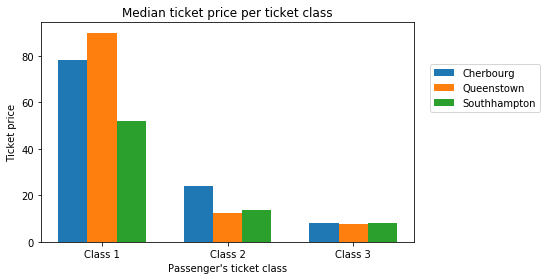

In [31]:
generate_combined_bar_chart([{'label': 'Cherbourg', 'value': fare_emb_c}, {'label': 'Queenstown', 'value': fare_emb_q}, 
                    {'label': 'Southhampton', 'value': fare_emb_s}], "Passenger's ticket class", 'Ticket price',
                   "Median ticket price per ticket class", ('Class 1', 'Class 2', 'Class 3'))

In this plot we can see that all of the third class tickets had almost the same price for of the three departure ports, being this price around 7.9.

For second class tickets, the median prices from Southhampton and Queenstown ports are very similar, around 13, while in Cherbourg is 24.

The first class tickets' median for Cherbourg port is 78.2, for Queenstown 90.0 and for Southhampton 58.0. This difference in prices can be related to the different fist class cabins, some of them might have been more expensive than others, so the ticket's prices can be more related to the type of cabin than to the departure port.

As there were no units for the tickets prices in the data set (or the kaggle explanation) I haven't used any unit to refer to those. Although, it is likely that the unit is Sterling Pounds (GBP).

## Conclusions

Taking into consideration a sample of 891 of the 2224 passengers of the Titanic, I could get some statistics about the passengers and survival rates according to different factors. 

It is clear that what we saw represented in the Titanic movie about giving priority to women and children to enter in the lifeboats was actually applied, as the passengers who had the most survival rates by group are:
- Female passengers
- Passengers from 0 to 17 years old
- Passengers with first class tickets


Regarding the tickets prices, there does not seem to be a correlation between the first class ticket's price and the departure port. This could be because the variance in prices was related to the cabin in the boat rather than the departure port. It would have been helpful to have more information about the cabin variable to test this assumption. As there are a lot of missing values in this variable, I did not consider to use it. 


It is important to note that there are some limitations related to this data: there are some passengers whose age is not in the data set, it would have been more convenient to have the age of all the passengers to calculate more accurate statistics about the data, as well as it would have been helpful to have data about more passengers. It would also have been helpful to have information about the Titanic crew, to see if the tickets prices that appear as zero are from crew members and to calculate statistics about their survival rates.

## References

Data set: https://www.kaggle.com/c/titanic/data

These are the most important references I consulted while working on this project:
- https://matplotlib.org/users/pyplot_tutorial.html 
- https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
- https://stackoverflow.com/questions/31304131/pandas-show-multiple-bar-graphs-on-a-chart
- https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
- https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column 
- https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
- https://pythonspot.com/en/matplotlib-bar-chart/
- https://matplotlib.org/users/colors.html
- https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html 
- https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html 
- https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
- https://stackoverflow.com/questions/19609631/python-changing-row-index-of-pandas-data-frame